In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [47]:
df = pd.read_csv("part_conditions.csv")

In [3]:
df.head()

unit_number  cycle_number  setting_1  setting_2  setting_3  sensor_1  \
0            1             1    -0.0007    -0.0004      100.0    518.67   
1            1             2     0.0019    -0.0003      100.0    518.67   
2            1             3    -0.0043     0.0003      100.0    518.67   
3            1             4     0.0007     0.0000      100.0    518.67   
4            1             5    -0.0019    -0.0002      100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_13  sensor_14  \
0    641.82   1589.70   1400.60     14.62  ...    2388.02    8138.62   
1    642.15   1591.82   1403.14     14.62  ...    2388.07    8131.49   
2    642.35   1587.99   1404.20     14.62  ...    2388.03    8133.23   
3    642.35   1582.79   1401.87     14.62  ...    2388.08    8133.83   
4    642.37   1582.85   1406.22     14.62  ...    2388.04    8133.80   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0     8.4195       0.03        392       2388      100.0      39.06   
1     8.4318       0.03        392       2388      100.0      39.00   
2     8.4178       0.03        390       2388      100.0      38.95   
3     8.3682       0.03        392       2388      100.0      38.88   
4     8.4294       0.03        393       2388      100.0      38.90   

   sensor_21  RUL  
0    23.4190  191  
1    23.4236  190  
2    23.3442  189  
3    23.3739  188  
4    23.4044  187  

[5 rows x 27 columns]

In [4]:
df.shape

(20631, 27)

In [53]:
units = df.groupby(["unit_number"])["RUL"].max()
print(units)

unit_number
1      191
2      286
3      178
4      188
5      268
      ... 
96     335
97     201
98     155
99     184
100    199
Name: RUL, Length: 100, dtype: int64


In [54]:
units.min()

127

In [ ]:
# The engine that failed in the fewest number of cycles was 127 cycles this means that it failed the fastest.

In [64]:
units.max()

361

In [65]:
# The engine that failed in the largest number of cycles was 361 cycles this means that it failed the slowest. 

In [66]:
units.mean()

205.31

In [ ]:
# All engines took an average of about 205 cycles to fail.

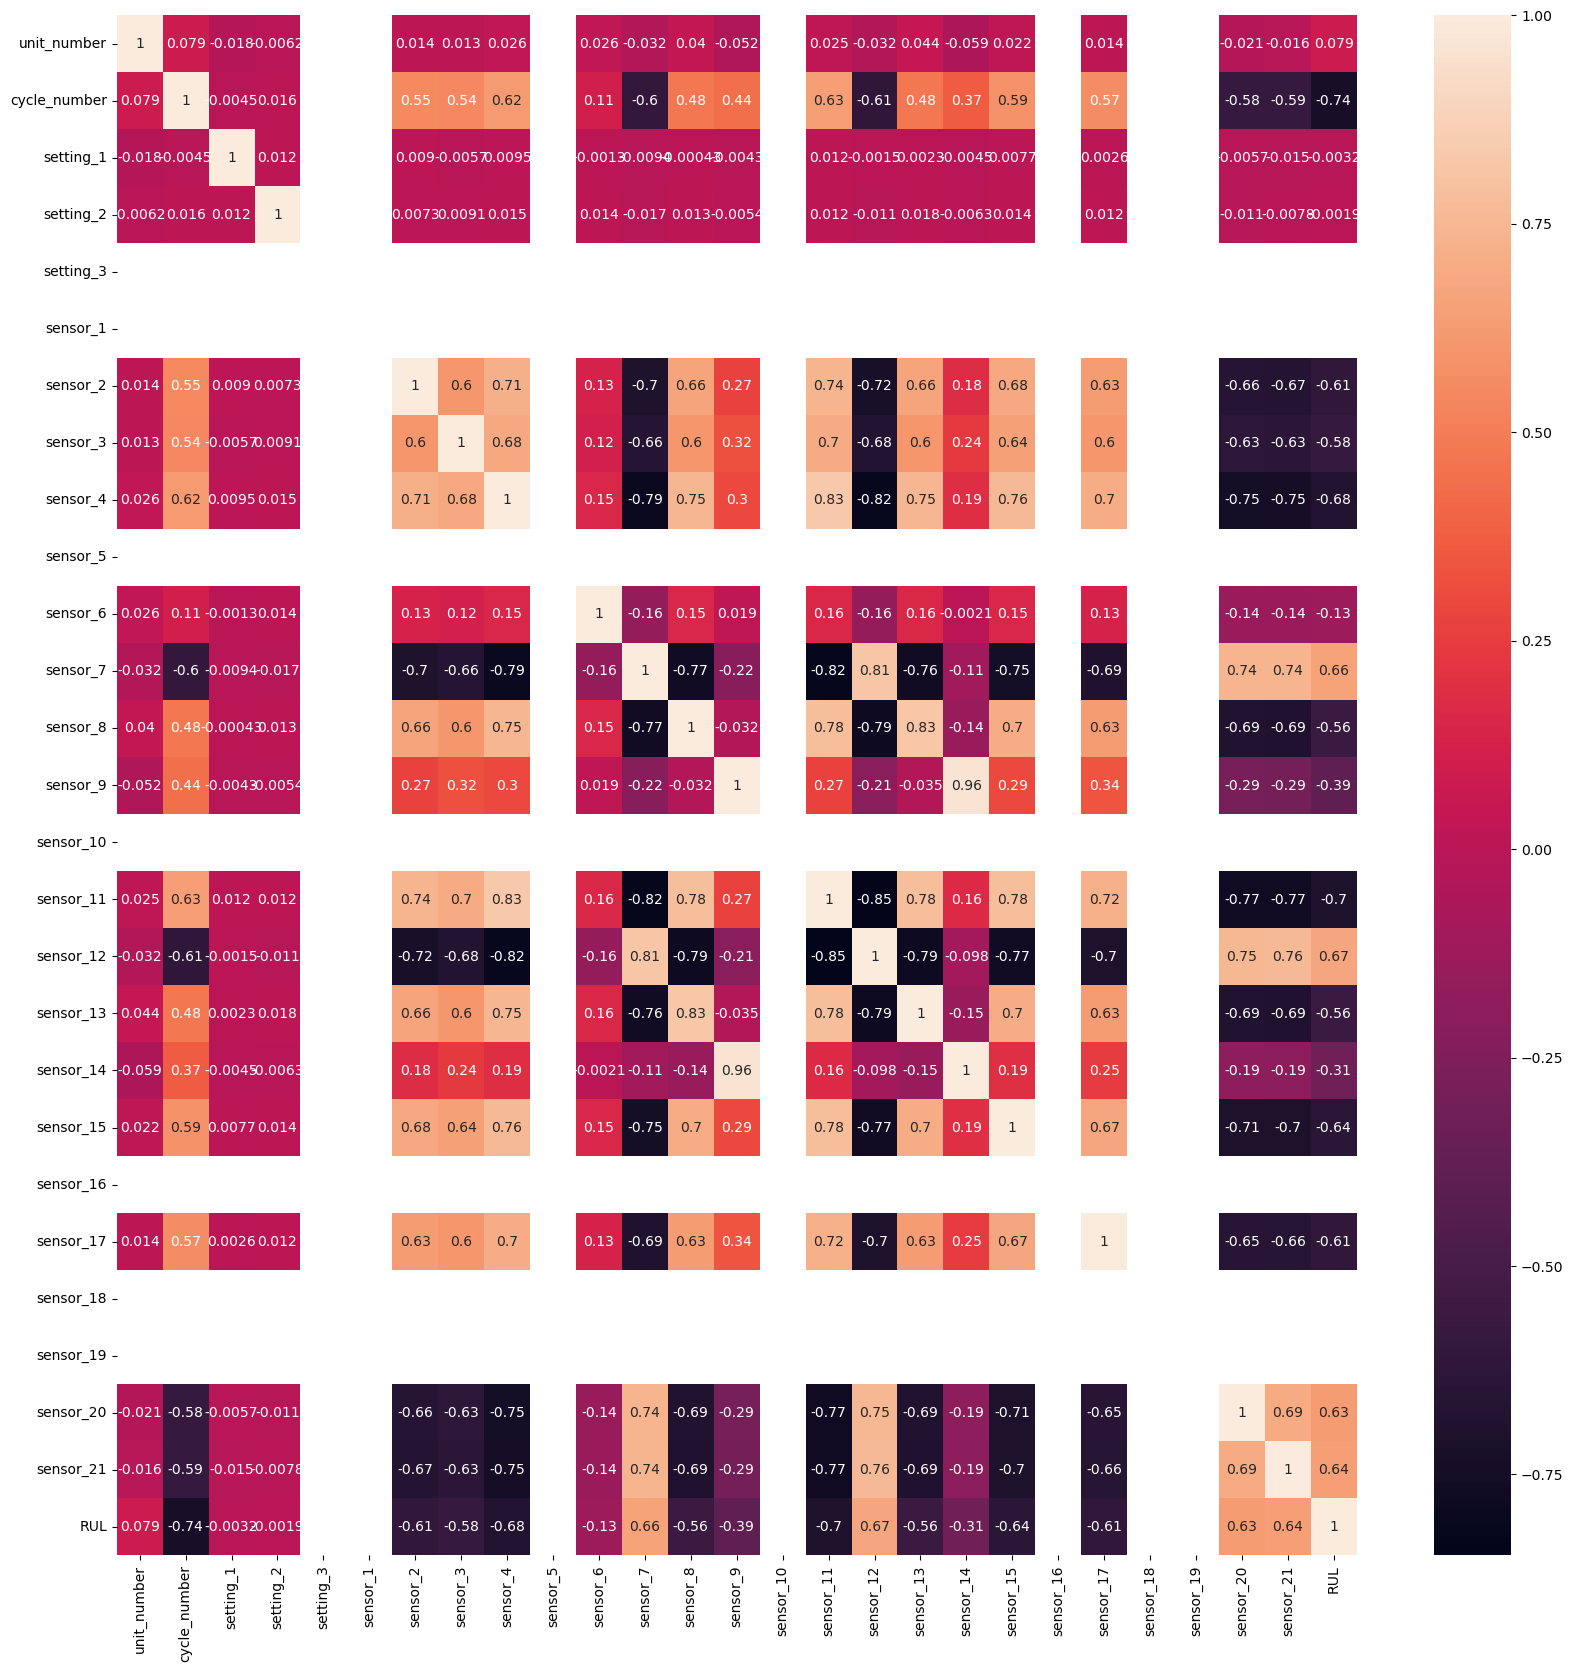

In [12]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.corr(),annot = True)
plt.show()

In [ ]:
# The RUL is highly correlated with the cycle number (-0.74).  There are a few sensors that have a higher correlation than others 
# when it comes to the RUl and the settings seem to have no correlation with the RUL.

In [ ]:
# The data that does not have a correlation are values that do not seem to change when looking at the data set. Since the correlation
# coefficent is calculated by taking the sum of the difference of the x values from the mean x multiplied by difference of the y values
# and the mean y all divded by the number of samples -1 times the standard deviation of x and standard deviation of y.  Since the 
# values are the sample throughout the column you would have a standard deviation of 0.  This would cause the information to be 
# divided by zero which would give a NaN value.  Based on the correlation table this happens to setting 3, sensor 1, sensor 5,
# sesnor 10, sensor 16, sensor 18, and sensor 19.

In [61]:
drop = df.drop(["setting_3","sensor_1","sensor_5","sensor_10","sensor_16","sensor_18","sensor_19"], axis = 1)

In [ ]:
# I think it is reasonable to drop these settings and sensors since their values did not change throughout
# all of the cycles from beginning to failure.  Eliminating them does not take away any information that would 
# explain how many cycles it takes for the engine to fail.  They are the same across all engines.

In [37]:
drop.head()

unit_number  cycle_number  setting_1  setting_2  sensor_2  sensor_3  \
0            1             1    -0.0007    -0.0004    641.82   1589.70   
1            1             2     0.0019    -0.0003    642.15   1591.82   
2            1             3    -0.0043     0.0003    642.35   1587.99   
3            1             4     0.0007     0.0000    642.35   1582.79   
4            1             5    -0.0019    -0.0002    642.37   1582.85   

   sensor_4  sensor_6  sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  \
0   1400.60     21.61    554.36   2388.06   9046.19      47.47     521.66   
1   1403.14     21.61    553.75   2388.04   9044.07      47.49     522.28   
2   1404.20     21.61    554.26   2388.08   9052.94      47.27     522.42   
3   1401.87     21.61    554.45   2388.11   9049.48      47.13     522.86   
4   1406.22     21.61    554.00   2388.06   9055.15      47.28     522.19   

   sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  RUL  
0    2388.02    8138.62     8.4195        392      39.06    23.4190  191  
1    2388.07    8131.49     8.4318        392      39.00    23.4236  190  
2    2388.03    8133.23     8.4178        390      38.95    23.3442  189  
3    2388.08    8133.83     8.3682        392      38.88    23.3739  188  
4    2388.04    8133.80     8.4294        393      38.90    23.4044  187

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [62]:
x = drop.drop(["unit_number","cycle_number","RUL"], axis = 1)
y = df["RUL"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train,y_train)

print(model.score(x_train,y_train))

0.5796708900291212


In [ ]:
# The training data score is 0.58.

In [40]:
ypred = model.predict(x_test)
r2_score(y_test,ypred)

0.5746993977900892

In [ ]:
# The test data score is 0.574.

In [ ]:
# I got scores that are close together because I scaled the data and it was the correct scaling for 
# this model. 

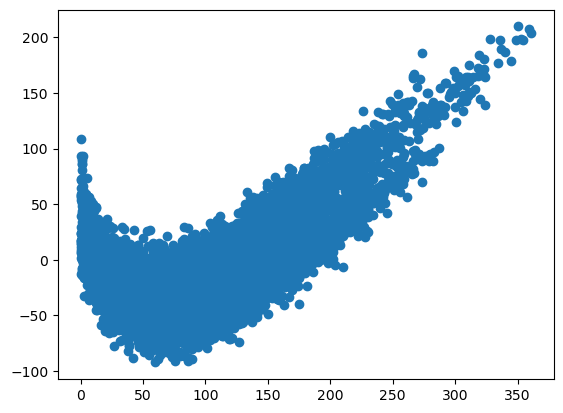

In [41]:
residuals = (y_test - ypred)
plt.scatter(y_test, residuals)

In [ ]:
# I notice that there is a good line of best fit for data that is above 50.  When the values are below
# 50 there are much larger gaps in the test values versus the predicted values.  As x increases you can 
# see that the residuals are closer to the line of best fit. 

In [ ]:
# I am predicting the RUL or number of cycles that an engine can go through before failing.
# I am using all of the features except the unit number, cycle number, and the previously given RUl
# as my inputs. If I was in the real world I would be taking the features from a new engine and creating
# a predictive value of how many cycles this engine would be able to go through without failing.

In [69]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(),n_features_to_select = 1) 
fit = rfe.fit(x_train,y_train)

print(fit.n_features_)
print(fit.ranking_)

x.columns


1
[16 17 11 12  5 15  4 13  2  1  3 14  6  7 10  9  8]


Index(['setting_1', 'setting_2', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_20', 'sensor_21'],
      dtype='object')

In [ ]:
# I ranked the features with only 1 having the top spot.  The strongest is sensor 11.

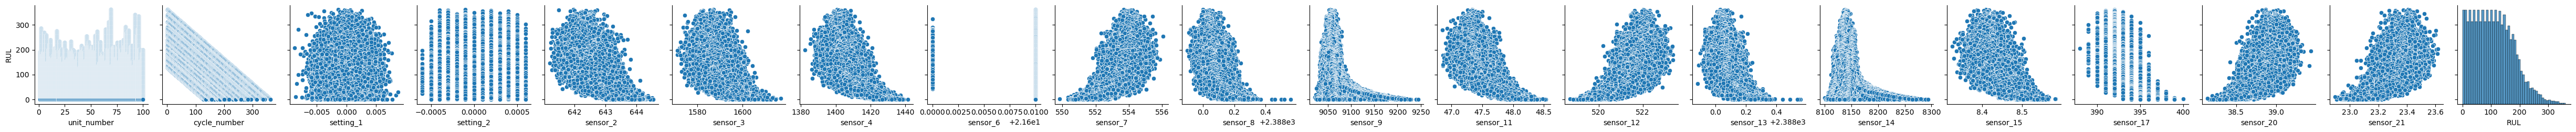

In [42]:
sns.pairplot(data=drop,y_vars=['RUL'])

In [ ]:
# Three worst predictors from the RFE is setting 1, setting 2, and sensor 6.  When looking at these specific 
# pairplots it makes sense that these were picked as the worst.  Setting 1 pair plot is the third pair plot
# that has data points literally all over the place.  It almost looks like a box, there is a data point everywhere.
# The setting 2 pairplot is the one next to it, 4th in, and it has striaght lines of data points throughout each
# of the x values.  There is no sort of correlation between the x and y.  The sensor 6 data points is the plot that has
# only two lines of data, one at the very beginning and one at the very end of the x values.  It almost looks
# like it bounces between the two values with not sort of pattern.

In [6]:
df2 = pd.read_csv("defects.csv")

In [52]:
df2.shape

(1840, 29)

(array([152., 180.,   0., 376.,   0.,  68.,  51.,   0., 385., 628.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

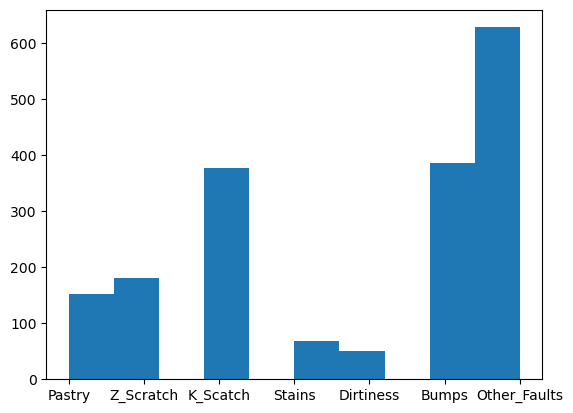

In [44]:
plt.hist(df2["fault_type"])

In [ ]:
# The distribution of fault types is not balanced at all between them.  There are few that deal with the
# stains and dirtiness and lots that deal with other faults and bumps.  

In [14]:
x2 = df2.drop(["fault_type","Unnamed: 0"], axis = 1)
y2 = df2["fault_type"]

x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size = 0.3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train_scaled2, y_train2)
y_pred2 = model2.predict(x_test_scaled2)
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.7192028985507246


C:\Users\katel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_pred2

array(['Pastry', 'Other_Faults', 'Other_Faults', 'Z_Scratch', 'Z_Scratch',
       'Bumps', 'K_Scatch', 'Other_Faults', 'K_Scatch', 'Other_Faults',
       'K_Scatch', 'Bumps', 'K_Scatch', 'Pastry', 'Other_Faults', 'Bumps',
       'Other_Faults', 'K_Scatch', 'Z_Scratch', 'Other_Faults',
       'Z_Scratch', 'Dirtiness', 'K_Scatch', 'Pastry', 'K_Scatch',
       'Other_Faults', 'K_Scatch', 'Other_Faults', 'Stains', 'Z_Scratch',
       'Other_Faults', 'K_Scatch', 'Other_Faults', 'K_Scatch',
       'Z_Scratch', 'Z_Scratch', 'Bumps', 'Other_Faults', 'Z_Scratch',
       'Pastry', 'Other_Faults', 'K_Scatch', 'Other_Faults',
       'Other_Faults', 'Other_Faults', 'K_Scatch', 'Other_Faults',
       'K_Scatch', 'K_Scatch', 'Dirtiness', 'Bumps', 'Other_Faults',
       'Bumps', 'K_Scatch', 'K_Scatch', 'K_Scatch', 'Bumps', 'Bumps',
       'Other_Faults', 'Z_Scratch', 'K_Scatch', 'Pastry', 'Pastry',
       'Z_Scratch', 'K_Scatch', 'Other_Faults', 'Other_Faults',
       'Other_Faults', 'Dirtiness', 'Z_S

In [ ]:
#These are the predicted values that came out of my first logistic regression model. 

In [51]:
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test2, y_pred2)
print(cm)

[[ 66   0   2  40   6   1   3]
 [  0  12   0   8   1   0   0]
 [  0   0  99   4   2   0   1]
 [ 34   1   9 116  14   0   9]
 [  3   0   0  16  27   0   1]
 [  0   0   0   2   0  23   0]
 [  3   0   1   6   0   0  42]]


In [ ]:
# The diagonal values were the ones that were correctly predicted.  Adding up the diagnol we get 385 values were predicted corretly.
# This is out of 552 total values. There were 167 that were not calculated correctly.  This means that 69.7 percent of the values 
# were correctly predicted.  The value that was the most improperly classified was the fourth row since it had the most datapoints
# outside of the correct diagonal spot.  

In [16]:
model3 = LogisticRegression(max_iter = 200)
model3.fit(x_train_scaled2, y_train2)
y_pred3 = model3.predict(x_test_scaled2)
from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred3))

Accuracy: 0.7192028985507246


In [ ]:
# The accuracy of my model did not change by setting the max iteration value to 200.  What did change is
# that my warning about convergence did go away.  

In [17]:
model4 = LogisticRegression(max_iter = 5000)
model4.fit(x_train_scaled2, y_train2)
y_pred4 = model4.predict(x_test_scaled2)
from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred4))

Accuracy: 0.7192028985507246


In [ ]:
# The accuaracy of my model did not chagne from the two previous accuracy numbers.  This is because I 
# only changed the maximum iterations. SInce the data set converged with 200 then it is expected that 
# the accuracy would not change between the models. 

In [72]:
x3 = df2.drop(["fault_type","Unnamed: 0"], axis = 1)
y3 = df2["fault_type"]

x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.3)

scaler = MinMaxScaler()
x_train_scaled3 = scaler.fit_transform(x_train3)
x_test_scaled3 = scaler.transform(x_test3)

model4 = LogisticRegression()
model4.fit(x_train3,y_train3)

y_pred4 = model4.predict(x_test_scaled3)
from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred4))


Accuracy: 0.3677536231884058


C:\Users\katel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\katel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
# The accuracy went way down (from 0.71 to 0.37), some of this change can be explained 
# by the fact that I set up new training and testing data sets.  However, I would not expected this 
# alone to cause such a large change in accuracy.  The scaling of the model (using min max scaler) has
# decreased the accuracy of the model. The standard scaler is better for this particular data set.  The
# minmaxscaler transforms teh features by scaling each feature to a given range.

In [80]:
model5 = LogisticRegression(max_iter = 10000, penalty="l2", C = 0.1) 
model5.fit(x_train_scaled3, y_train3)
y_pred5 = model5.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred5)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred5))


[[ 57   0   2  46   0   0   2]
 [  1   0   0  14   0   0   0]
 [  1   0  94   9   0   0   0]
 [ 37   0  21 138   1   0   6]
 [  9   0   0  40   1   0   3]
 [  0   0   0  14   0   2   0]
 [  4   0   2   6   0   0  42]]
Accuracy: 0.605072463768116


In [81]:
model6 = LogisticRegression(max_iter = 10000, penalty="l2", C = 1) 
model6.fit(x_train_scaled3, y_train3)
y_pred6 = model6.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred6)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred6))

[[ 58   0   0  45   1   1   2]
 [  0   6   0   7   2   0   0]
 [  0   1  98   5   0   0   0]
 [ 40   2  13 129  10   2   7]
 [  8   0   0  19  22   1   3]
 [  0   0   0   1   0  15   0]
 [  3   0   1   6   0   0  44]]
Accuracy: 0.6739130434782609


In [82]:
model7 = LogisticRegression(max_iter = 10000, penalty="l2", C = 10) 
model7.fit(x_train_scaled3, y_train3)
y_pred7 = model7.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred7)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred7))

[[ 57   0   0  45   2   1   2]
 [  0   7   0   7   1   0   0]
 [  1   0  96   5   2   0   0]
 [ 39   4  13 125   9   3  10]
 [  5   1   0  16  28   1   2]
 [  0   0   0   0   0  16   0]
 [  1   0   1   6   0   0  46]]
Accuracy: 0.6793478260869565


In [83]:
model8 = LogisticRegression(max_iter = 10000,penalty="l2", C = 100) 
model8.fit(x_train_scaled3, y_train3)
y_pred8 = model8.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred8)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred8))

[[ 53   0   0  47   3   1   3]
 [  0   9   0   6   0   0   0]
 [  2   0  98   3   1   0   0]
 [ 40   4   9 128  10   3   9]
 [  6   1   0  13  30   1   2]
 [  0   0   0   0   0  16   0]
 [  1   0   1   6   0   0  46]]
Accuracy: 0.6884057971014492


In [84]:
model8 = LogisticRegression(max_iter = 10000,penalty="l2", C = 1000) 
model8.fit(x_train_scaled3, y_train3)
y_pred8 = model8.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred8)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred8))

[[ 55   0   1  44   4   0   3]
 [  0   9   0   6   0   0   0]
 [  2   0  97   4   1   0   0]
 [ 37   4   9 130  11   3   9]
 [  5   1   0  13  31   1   2]
 [  0   0   0   0   0  16   0]
 [  1   0   1   6   0   0  46]]
Accuracy: 0.6956521739130435


In [85]:
model9 = LogisticRegression(max_iter = 10000,penalty="l2", C = 10000) 
model9.fit(x_train_scaled3, y_train3)
y_pred9 = model9.predict(x_test_scaled3)

cm = metrics.confusion_matrix(y_test3, y_pred9)
print(cm)
print("Accuracy:", metrics.accuracy_score(y_test3, y_pred9))

[[ 54   0   1  44   4   1   3]
 [  0   8   0   6   1   0   0]
 [  1   0  98   5   0   0   0]
 [ 36   3  11 130  11   3   9]
 [  4   1   0  12  33   1   2]
 [  0   0   0   0   0  16   0]
 [  1   0   2   5   0   0  46]]
Accuracy: 0.697463768115942


In [ ]:
# The optimal C value for my model was 10,000.  This means that the smallest amount of regularization 
# ended up working the best for my model.  As our C value increases the accuracy of my models also increased.
# This tells me that when I used smaller C values with more regularization it produced a less accurate
# model in the end.  I wanted to see the confusion matrix of all of the models tao see if where the 
# errors occured and if they moved around while I changed C, I found that the overall patterns of where
# the wrong classifications occured did not change when changing C.